In [126]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


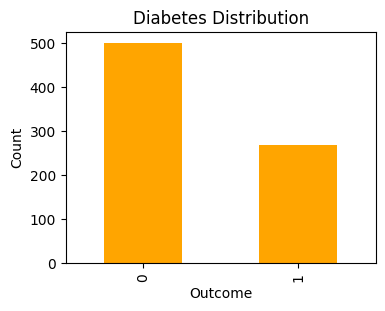

In [130]:
import matplotlib.pyplot as plt
class_distribution = df[target].value_counts()
# Plotting
plt.figure(figsize=(4, 3))
class_distribution.plot(kind='bar', color='orange')
plt.title('Diabetes Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [131]:
features = df.columns[:-1]
target = 'Outcome'
X = df[features]
y = df[target]

In [136]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=6)
rfe = rfe.fit(X, y)
feature_map = zip(rfe.get_support(), X.columns)
selected_features = [feature for i, feature in feature_map if i]
selected_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [137]:
X = df[selected_features]

In [138]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [141]:
# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [143]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, y_pred)
print("Total test data: ", y_test.shape[0])
print(cm)

Total test data:  154
[[87 12]
 [23 32]]
